In [2]:
import numpy as np
import pandas as pd
import seaborn

In [3]:
import random

def random_sales(min, max):
    li = []
    for i in range(0, 12):
        element = random.randint(min, max)
        li.append(element)
    return li

sales = pd.DataFrame({
    'iPhone': random_sales(5, 15),
    'Samsung Galaxy': random_sales(8, 20),
    'Google Pixel': random_sales(3, 10),
    'OnePlus': random_sales(5, 15),
    'Xiaomi Redmi': random_sales(10, 25),
    'Huawei P Series': random_sales(7, 18),
    'Sony Xperia': random_sales(3, 12),
    'LG G Series': random_sales(2, 8),
    'Motorola Moto': random_sales(4, 12),
    'Nokia Lumia': random_sales(1, 5)
})

sales

,iPhone,Samsung Galaxy,Google Pixel,OnePlus,Xiaomi Redmi,Huawei P Series,Sony Xperia,LG G Series,Motorola Moto,Nokia Lumia
0,7,15,7,8,19,7,8,2,6,4
1,5,12,10,7,15,12,7,7,12,2
2,6,14,3,6,21,14,4,2,6,3
3,9,8,10,13,25,10,3,8,10,3
4,11,14,8,6,11,18,8,3,11,2
5,11,20,9,14,11,11,7,4,9,5
6,12,12,7,14,19,17,4,3,11,4
7,12,10,4,5,19,15,6,7,6,5
8,12,16,3,9,25,9,6,3,11,1
9,9,11,5,9,18,12,9,7,5,2


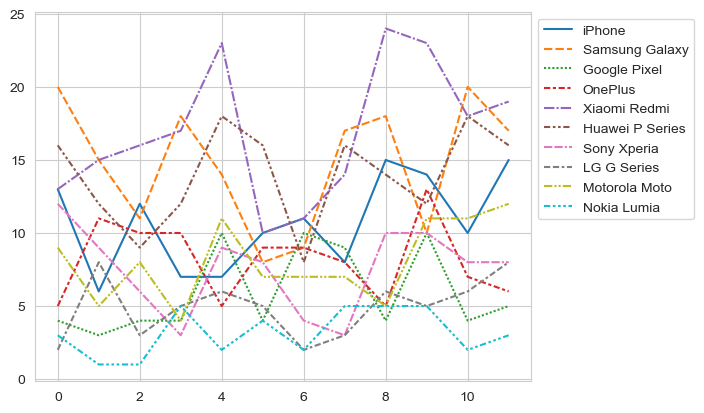

In [17]:
lp = seaborn.lineplot(sales)
seaborn.move_legend(lp, 'upper left', bbox_to_anchor=(1, 1))

In [8]:
p0 = sales.sum() / sales.shape[0]
print(p0)

iPhone              8.833333
Samsung Galaxy     13.166667
Google Pixel        6.666667
OnePlus             9.166667
Xiaomi Redmi       18.166667
Huawei P Series    13.166667
Sony Xperia         6.166667
LG G Series         4.333333
Motorola Moto       8.583333
Nokia Lumia         3.166667
dtype: float64


In [9]:
square_std = ((sales - p0) ** 2).sum() / (sales.shape[0] - 1)
std = square_std ** 0.5
reliability = std / p0
print(reliability)

iPhone             0.308462
Samsung Galaxy     0.233156
Google Pixel       0.416151
OnePlus            0.374547
Xiaomi Redmi       0.266414
Huawei P Series    0.272560
Sony Xperia        0.358183
LG G Series        0.523776
Motorola Moto      0.287352
Nokia Lumia        0.400201
dtype: float64


In [10]:
predict = pd.DataFrame([p0 + np.random.normal(0, std, len(p0))])
predict

,iPhone,Samsung Galaxy,Google Pixel,OnePlus,Xiaomi Redmi,Huawei P Series,Sony Xperia,LG G Series,Motorola Moto,Nokia Lumia
0,10.598256,14.784066,8.856245,4.778549,19.947915,7.729917,8.36596,2.642765,6.409299,3.480648


In [21]:
condition1 = ((sales - p0) < 2 * std).all()
condition2 = p0 > 2 * std
condition3 = (sales > 0).all()

print('Условие 1: ')
print(condition1)
print('\n')
print('Условие 2: ')
print(condition2)
print('\n')
print('Условие 3: ')
print(condition3)

Условие 1: 
iPhone             True
Samsung Galaxy     True
Google Pixel       True
OnePlus            True
Xiaomi Redmi       True
Huawei P Series    True
Sony Xperia        True
LG G Series        True
Motorola Moto      True
Nokia Lumia        True
dtype: bool


Условие 2: 
iPhone              True
Samsung Galaxy      True
Google Pixel        True
OnePlus             True
Xiaomi Redmi        True
Huawei P Series     True
Sony Xperia         True
LG G Series         True
Motorola Moto       True
Nokia Lumia        False
dtype: bool


Условие 3: 
iPhone             True
Samsung Galaxy     True
Google Pixel       True
OnePlus            True
Xiaomi Redmi       True
Huawei P Series    True
Sony Xperia        True
LG G Series        True
Motorola Moto      True
Nokia Lumia        True
dtype: bool


In [22]:
product_color = pd.Series(dtype='string')
for product in sales.columns:
    if not condition3[product]:
        product_color[product] = 'Red'
    elif not condition1[product] and not condition2[product]:
        product_color[product] = 'Orange'
    elif not condition1[product] or not condition2[product]:
        product_color[product] = 'Yellow'
    else:
        product_color[product] = 'Green'

print(product_color)

iPhone              Green
Samsung Galaxy      Green
Google Pixel        Green
OnePlus             Green
Xiaomi Redmi        Green
Huawei P Series     Green
Sony Xperia         Green
LG G Series         Green
Motorola Moto       Green
Nokia Lumia        Yellow
dtype: object
